In [21]:
import pandas as pd
import seaborn as sns

In [22]:
dataset=pd.read_csv("Placement.csv")

In [23]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


Find the reason for non-placement from the dataset? 

In [25]:
def quanQual(dataset):
    quan=[]
    qual=[]
    for columnName in dataset.columns:
        #print(columnName)
        if(dataset[columnName].dtype=='O'):
            #print("qual")
            qual.append(columnName)
        else:
            #print("quan")
            quan.append(columnName)
    return quan,qual

In [26]:
quan,qual=quanQual(dataset)

In [27]:
dataset[quan]

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,1,67.00,91.00,58.00,55.0,58.80,270000.0
1,2,79.33,78.33,77.48,86.5,66.28,200000.0
2,3,65.00,68.00,64.00,75.0,57.80,250000.0
3,4,56.00,52.00,52.00,66.0,59.43,NaN
4,5,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,400000.0
211,212,58.00,60.00,72.00,74.0,53.62,275000.0
212,213,67.00,67.00,73.00,59.0,69.72,295000.0
213,214,74.00,66.00,58.00,70.0,60.23,204000.0


In [28]:
dataset[qual]

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...
210,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


The reason for non-placement candidate means they don’t have previous experience in
working environment this is the one of the reason they don’t placed in any companies. 

How many of them are not placed? 

In [29]:
dataset["status"].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

Replace the NaN values with correct value. And justify why you have chosen the same. 

In [30]:
dataset["salary"].fillna(dataset["salary"].median(),inplace=True)

C:\Users\RRDIL\AppData\Local\Temp\ipykernel_14364\1392895435.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["salary"].fillna(dataset["salary"].median(),inplace=True)


In [31]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,265000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


 What kind of relation between salary and mba_p

In [32]:
dataset.corr(numeric_only=True)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.047270
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.108669
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.122921
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.053352
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.169233
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.155673
salary,0.047270,0.108669,0.122921,0.053352,0.169233,0.155673,1.000000


The correlation between the mba_p and salary it is directly proportional only 14%.if mba_p
mark get increased salary also get increased but the increments ratio is only 14%. 


 Which specialization is getting minimum salary? 

In [33]:
dataset["salary"].min()

200000.0

 marketing and finance getting minimum value of salary

How many of them getting above 500000 salaries

In [34]:
salaries_above_500000=dataset[dataset["salary"]>500000]

In [35]:
print(salaries_above_500000["salary"])

119    940000.0
150    690000.0
177    650000.0
Name: salary, dtype: float64


Test the Analysis of Variance between etest_p and mba_p at signifance level 5%. (Make
decision using Hypothesis Testing) 

In [36]:
import scipy.stats as stats
stats.f_oneway(dataset['etest_p'],dataset['mba_p'])

F_onewayResult(statistic=98.64487057324706, pvalue=4.672547689133573e-21)

Test the similarity between the degree_t (Sci&Tech) and specialisation (Mkt&HR) with
respect to salary at significance level of 5%.(Make decision using Hypothesis Testing) 

In [21]:
#Independent sample -unpaired T Test

#same Group(salary) but different condition(degree_t(Sci&Tech),specialisation(Mkt&HR))


from scipy.stats import ttest_ind
dataset=dataset.dropna()
degree_t=dataset[dataset['degree_t']=='Sci&Tech']['salary']
specialisation=dataset[dataset['specialisation']=='Mkt&HR']['salary']
t_stat,p_value=ttest_ind(degree_t,specialisation)
print(f"T-statistic:{t_stat},P-value:{p_value}")

T-statistic:3.053005553314895,P-value:0.0026752836979138848


What is the probability Density Function of the salary range from 700000 to 900000

In [22]:
def get_pdf_probability(dataset,startrange,endrange):
        from matplotlib import pyplot
        from scipy.stats import norm
        import seaborn as sns
       
   
        ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
         #first create distplot and then give the dataset we have to create curve so kde(kernel density function) is True and 
         #we put the curve colour is blue and histogram colour is green.
        
        pyplot.axvline(startrange,color='Red')
        # py plot axis(ax) vertical line in start range ,the colour of the line is "Red"
      
        pyplot.axvline(endrange,color='Red')
        # py plot axis(ax) vertical line in end range ,the colour of the line is "Red"
       
        #generate a sample
        sample=dataset
       
        #calculate parameters
        sample_mean=sample.mean()
        sample_std=sample.std()
        print('Mean=%.3f,Standard Deviation=%.3f' % (sample_mean,sample_std))
       
        #define the distribution
        dist=norm(sample_mean,sample_std)
        #normal distribution have inbuild function we give sample_mean,sample_standard deviation so it create the distribution function
      
        #sample probabilities for a range of outcomes
        values=[value for value in range(startrange, endrange)]
        #single line for loop
        
        probabilities=[dist.pdf(value) for value in values]
        #dist.pdf pass the value  create the probability
        
        prob=sum(probabilities)
        #summation the probabilities
        
        print("The area between range({},{}:{}".format(startrange,endrange,sum(probabilities)))
        return prob

C:\Users\RRDIL\AppData\Local\Temp\ipykernel_11708\1476344966.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


Mean=281283.721,Standard Deviation=78232.510
The area between range(700000,900000:4.3446446507763126e-08


4.3446446507763126e-08

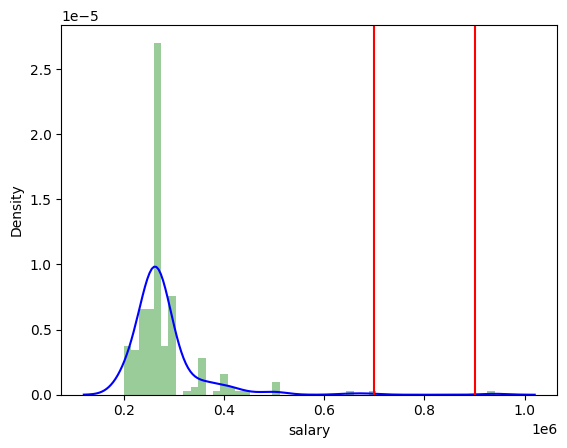

In [23]:
get_pdf_probability(dataset["salary"],700000,900000)

Convert the normal distribution to standard normal distribution for salary column 

In [24]:
def stdNBgraph(dataset):
 #converted to standard normal distribution
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()

    values=[i for i in dataset]
     #we pass the input dataset and the converted as list .
   
    z_score=[((j-mean)/std) for j in values]
    #calculate the zscore value from inliner for loop .
    
    sns.displot(z_score,kde=True)
    #plot the standard normal distribution graph.
    
    sum(z_score)/len(z_score)
    #z_score.std()
    

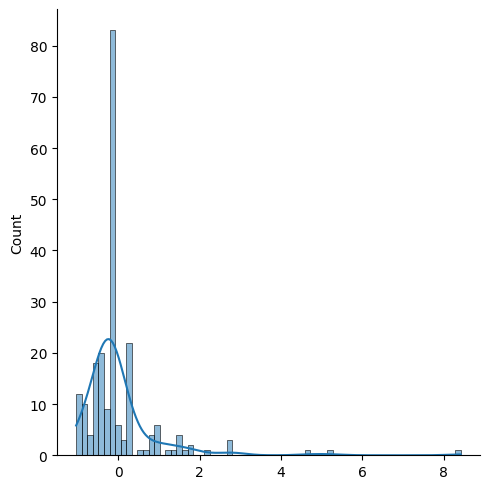

In [25]:
stdNBgraph(dataset["salary"])

 Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p
at significance level of 5%.(Make decision using Hypothesis Testing) 

In [26]:
#dependent sample -paired T Test

#same Group degree_t(Sci&Tech) but different condition(etest_p and mba_p)

from scipy.stats import ttest_ind
dataset=dataset.dropna()
etest_p=dataset[dataset['degree_t']=='Sci&Tech']['etest_p']
mba_p=dataset[dataset['degree_t']=='Sci&Tech']['mba_p']

ttest_ind(etest_p,mba_p)

TtestResult(statistic=4.532000225151251, pvalue=1.4289217003775636e-05, df=116.0)

 Which parameter is highly correlated with salary? 

In [27]:
dataset.corr(numeric_only=True)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.047270
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.108669
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.122921
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.053352
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.169233
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.155673
salary,0.047270,0.108669,0.122921,0.053352,0.169233,0.155673,1.000000


Etest_p only have 15% so that this only highly correlated 

Plot any useful graph and explain it

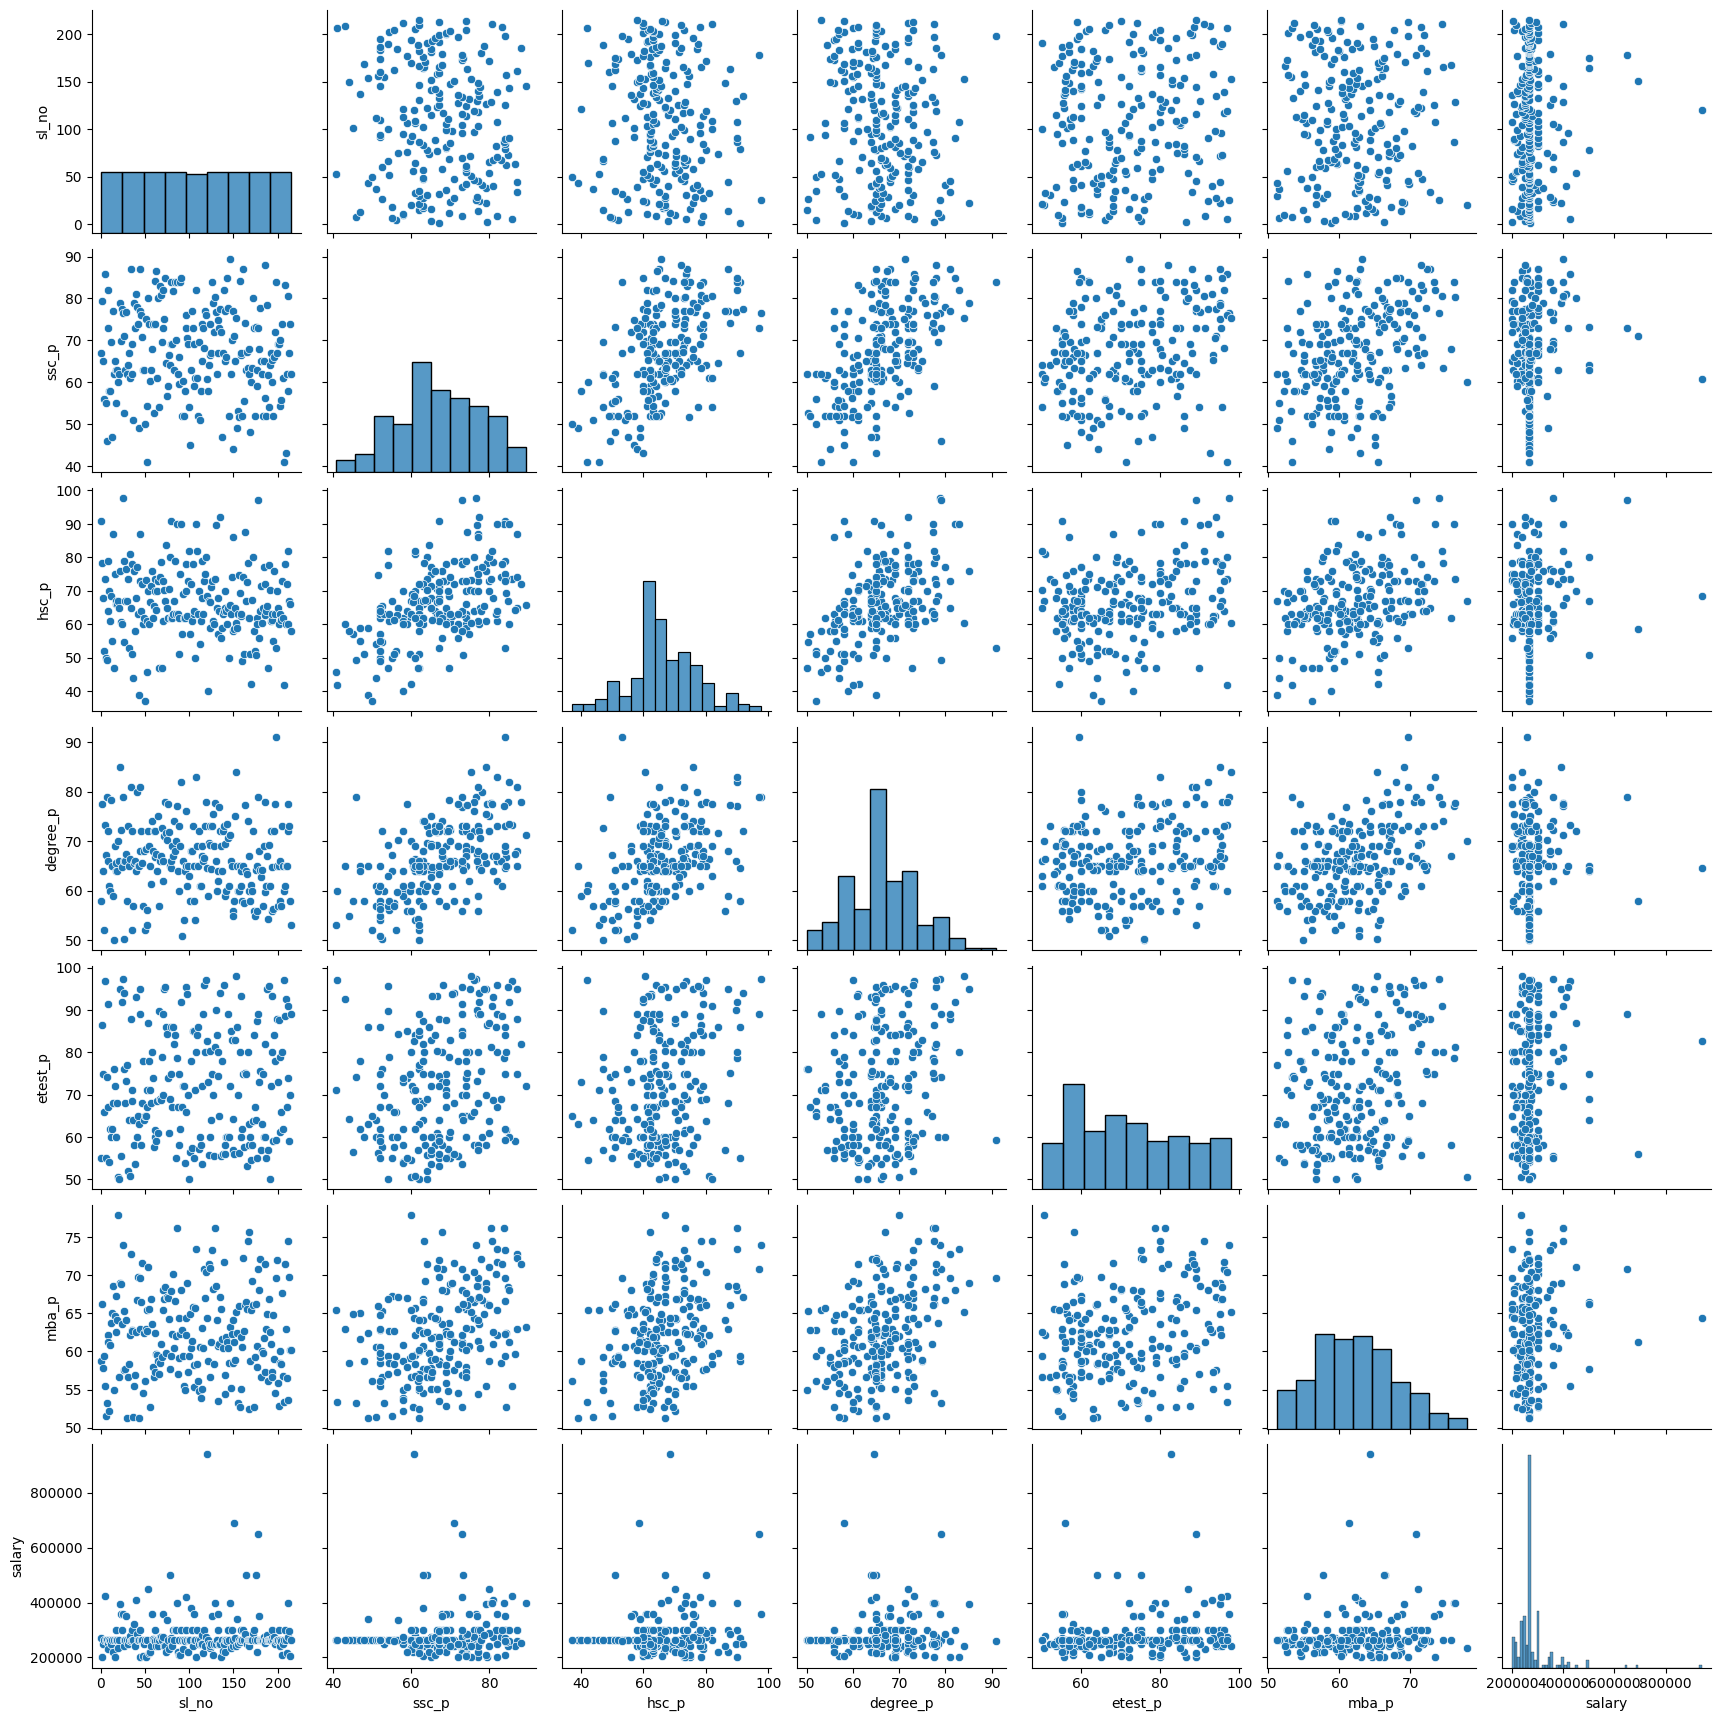

In [30]:
sns.pairplot(dataset)